# Machine Learning Midterm Colab

Dataset: German Credit Reports:  http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/

by Subarna Chowdhury Soma [SJSU ID: 014549587]


# Import Packages 

In [0]:
import pandas as pd
import numpy as np
import warnings
from matplotlib import pyplot
from pandas import Series, datetime
from pandas.plotting import scatter_matrix, autocorrelation_plot
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.utils import resample
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from xgboost import XGBClassifier
import seaborn as sns
import os

# Mount Drive

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Narrative

## Data Load

In [7]:
df_credit = pd.read_csv("/content/drive/My Drive/MLSpring2020/TheMeanSquares-StockPrediction/Midterm Dataset/german.data", low_memory =False, encoding = "ISO-8859-1", delim_whitespace = True, header = None)
df_credit.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


## Column Names

In [0]:
# column names
columns = ['checking_account', 'duration', 'credit_history', 'purpose', 'credit_amount',
'saving_account', 'present_emp_since', 'inst_rate', 'personal_status',
'other_debtors', 'residence_since', 'property', 'age', 'inst_plans',
'housing', 'num_credits', 'job', 'dependents', 'telephone', 'foreign_worker', 'status']

In [0]:
df_credit.columns = columns

## Description of the numeric columns

In [10]:
## description of numeric columns
df_credit.describe()

,duration,credit_amount,inst_rate,residence_since,age,num_credits,dependents,status
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


## Complete data

In [11]:
df_credit.head(5)

,checking_account,duration,credit_history,purpose,credit_amount,saving_account,present_emp_since,inst_rate,personal_status,other_debtors,residence_since,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


## Data Load -Numeric

In [12]:
import urllib.request
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric'
credit_data = urllib.request.urlopen(url)
credit=np.genfromtxt(credit_data)
X,y = credit[:,:-1], credit[:,-1:].squeeze()
print(X.shape, y.shape)


(1000, 24) (1000,)


In [13]:
X

array([[ 1.,  6.,  4., ...,  0.,  0.,  1.],
       [ 2., 48.,  2., ...,  0.,  0.,  1.],
       [ 4., 12.,  4., ...,  0.,  1.,  0.],
       ...,
       [ 4., 12.,  2., ...,  0.,  0.,  1.],
       [ 1., 45.,  2., ...,  0.,  0.,  1.],
       [ 2., 45.,  4., ...,  0.,  0.,  1.]])

In [14]:
y

array([1., 2., 1., 1., 2., 1., 1., 1., 1., 2., 2., 2., 1., 2., 1., 2., 1.,
       1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
       1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1.,
       2., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1.,
       1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2.,
       1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 2., 1., 1., 1., 1.,
       1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2.,
       2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 2., 2., 2., 1., 2., 1., 2.,
       1., 2., 1., 2., 2., 2., 1., 2., 2., 1., 2., 1., 2., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

## Types of columns

There are 8 integer type and 13 object type of columns are avaialble in data

In [15]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checking_account   1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   purpose            1000 non-null   object
 4   credit_amount      1000 non-null   int64 
 5   saving_account     1000 non-null   object
 6   present_emp_since  1000 non-null   object
 7   inst_rate          1000 non-null   int64 
 8   personal_status    1000 non-null   object
 9   other_debtors      1000 non-null   object
 10  residence_since    1000 non-null   int64 
 11  property           1000 non-null   object
 12  age                1000 non-null   int64 
 13  inst_plans         1000 non-null   object
 14  housing            1000 non-null   object
 15  num_credits        1000 non-null   int64 
 16  job                1000 non-null   object
 

## Shape of data

This dataset has 1000 rows and total 21 columns

In [16]:
df_credit.shape

(1000, 21)

# Visualization and Exploratory Analysis

## Histogram Plot 

Following is the histogram plot for all the numerical columns to visualize the distribution of in different interval

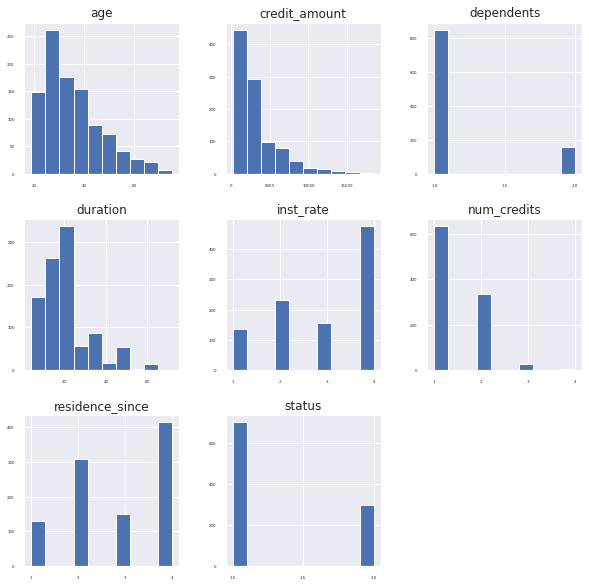

In [17]:
sns.set()
df_credit.hist(sharex = False, sharey = False, xlabelsize = 4, ylabelsize = 4, figsize=(10, 10))
pyplot.show()

## Size of 'Status' Column

Here (1 = good, 2 = bad). So Status column has 700 rows of 'good' value and '300' rows of bad value

Size of the Status column
status
1    700
2    300
dtype: int64


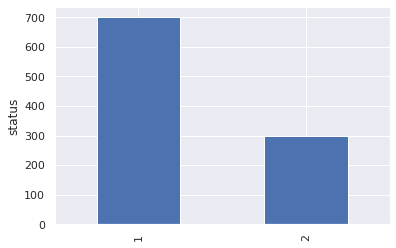

In [18]:
print("Size of the Status column")
print(df_credit.groupby('status').size())
df_credit['status'].value_counts().plot(kind="bar")
plt.ylabel('status')
plt.show()

## Plot- Credit_amount vs. Age 

From the plot it is clear that credit amount mostly remains below 5000 and belongs to people of age below 40

<Figure size 432x288 with 0 Axes>

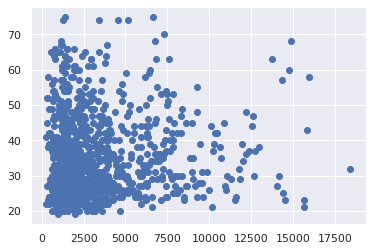

<Figure size 432x288 with 0 Axes>

In [19]:
plt.scatter(df_credit['credit_amount'],df_credit["age"])
plt.figure()

## Plot Credit_Amount vs. Duration

<Figure size 432x288 with 0 Axes>

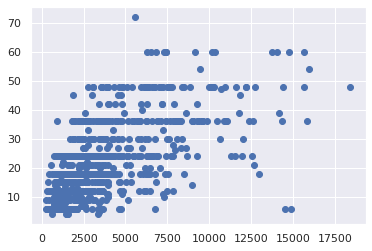

<Figure size 432x288 with 0 Axes>

In [20]:
plt.scatter(df_credit['credit_amount'],df_credit["duration"])
plt.figure()

## Plot Saving Account vs. Duration

<Figure size 432x288 with 0 Axes>

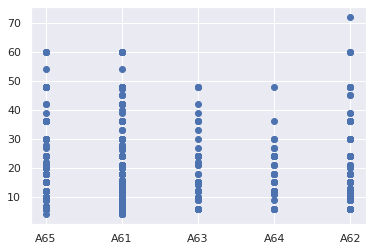

<Figure size 432x288 with 0 Axes>

In [21]:
plt.scatter(df_credit['saving_account'],df_credit["duration"])
plt.figure()

## Pair Plot

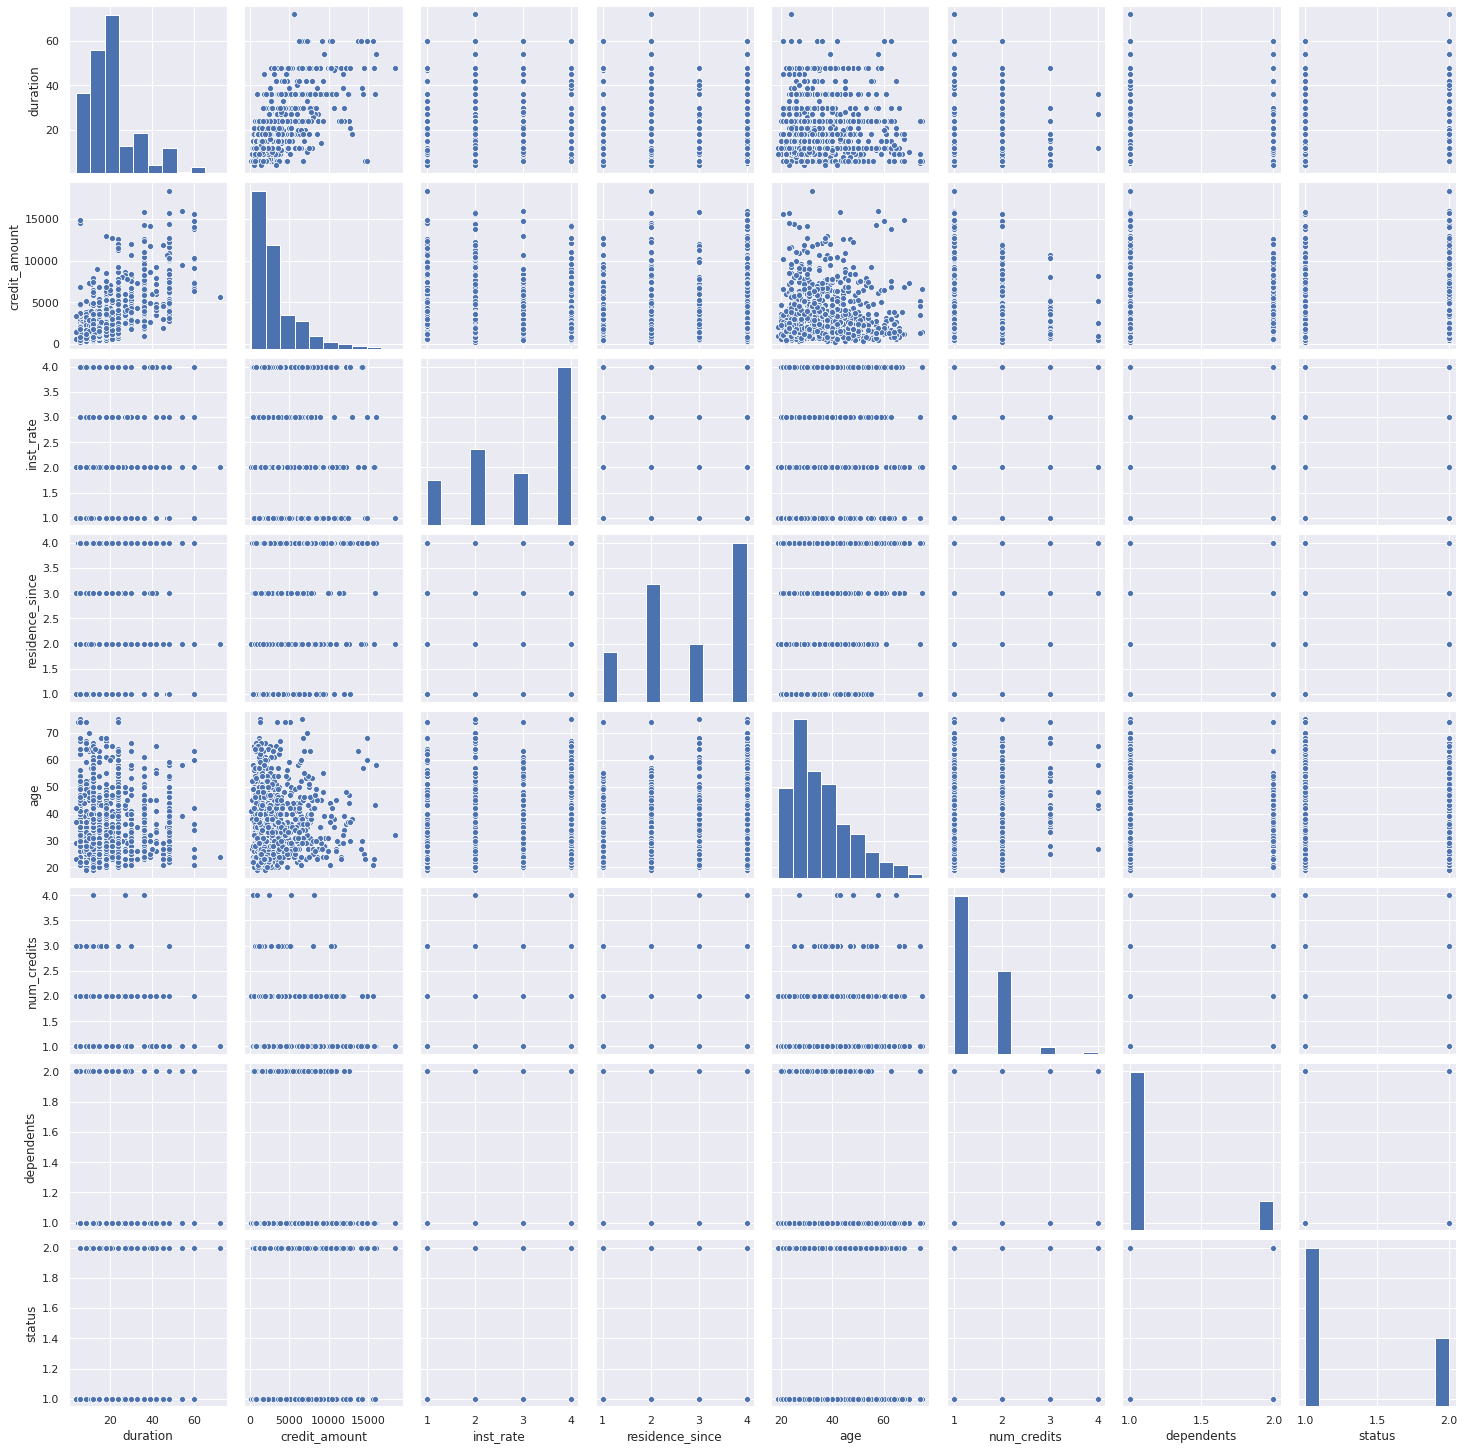

In [22]:
sns.pairplot(df_credit)

## Correlation Map for Numerical Features

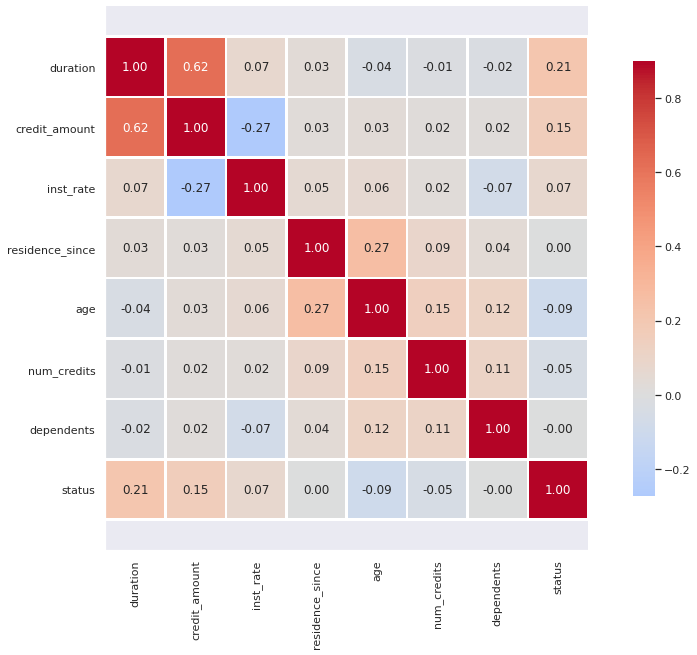

In [23]:
# Correlation

corr = df_credit.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

# Insight from Data Narrative and Exploratory Analysis

From different plotting and analysis of data following insights have been found: 

1. People from Age 23 to 32 are the target customer and the amount can be in range 2000 to 5000 <currency>.
2. Average age of credit amount taker belongs is 32yr +
3. Short term credit with credit range 2000 t0 5000 yield maximum customer and profits.

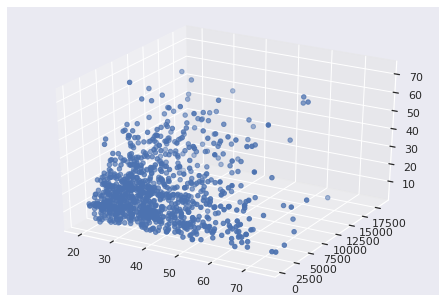

In [24]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import matplotlib.pyplot as plt
fig = plt.figure()
ax = Axes3D(fig)

# data for 3d plot
ax.scatter(df_credit['age'], df_credit['credit_amount'], df_credit['duration'])

# Data Enrichment 



Here I am trying to enrich data by computing another column called 
"Age_Group" with the following formula:

* Young: Clients age ranges from (19 - 29).
* Young Adults: Clients age ranges from (30-40)
* Senior: Clients age ranges from (41-55)
* Elder: Clients age is more than 55 years old

Importance of this column:
> Using this categorical column value, analysis can be done to see 
 the Credit amounts borrowed by clients belongs to which age group.
Also I can get deeper in  analysis and determine which loans were high risk and see if there is any patterns with regards to age groups. So this column will definitely enrich the base data set.

## Computation

In [25]:

df_credit['age_Group'] = np.nan

lst = [df_credit]

for col in lst:
    col.loc[(col['age'] > 18) & (col['age'] <= 29), 'age_Group'] = 'Young'
    col.loc[(col['age'] > 29) & (col['age'] <= 40), 'age_Group'] = 'Young Adults'
    col.loc[(col['age'] > 40) & (col['age'] <= 55), 'age_Group'] = 'Senior'
    col.loc[col['age'] > 55, 'age_Group'] = 'Elder' 
    
df_credit.head()


,checking_account,duration,credit_history,purpose,credit_amount,saving_account,present_emp_since,inst_rate,personal_status,other_debtors,residence_since,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status,age_Group
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1,Elder
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2,Young
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1,Senior
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1,Senior
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2,Senior


### Visualization

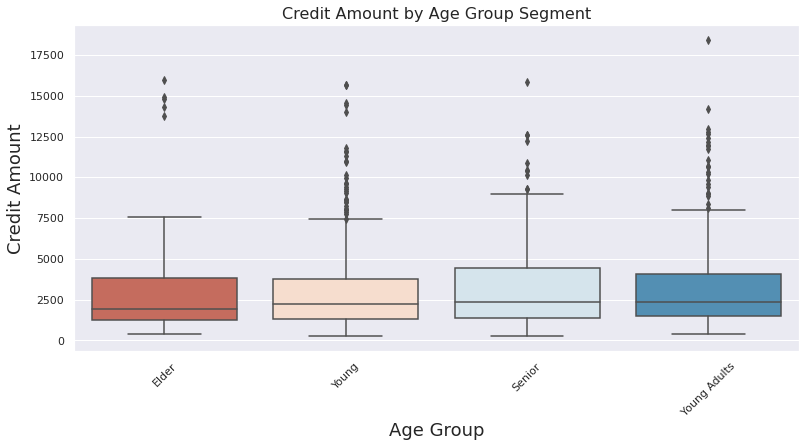

In [26]:
import seaborn as sns

plt.figure(figsize=(13,6)) #figure size
g = sns.boxplot(x='age_Group', y='credit_amount', 
                   data=df_credit, palette="RdBu")


g.set_title("Credit Amount by Age Group Segment", fontsize=16)
g.set_xticklabels(g.get_xticklabels(),rotation=45) # It's the way to rotate the xticks when we use variable to our graphs
g.set_xlabel('Age Group', fontsize=18) # Xlabel
g.set_ylabel('Credit Amount', fontsize=18) 
plt.show()

In [27]:
good_credit_df = df_credit.loc[df_credit['status'] == 1]
bad_credit_df = df_credit.loc[df_credit['status'] == 2]

good_credit_df.head()

,checking_account,duration,credit_history,purpose,credit_amount,saving_account,present_emp_since,inst_rate,personal_status,other_debtors,residence_since,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status,age_Group
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1,Elder
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1,Senior
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1,Senior
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,4,A124,35,A143,A153,1,A172,2,A192,A201,1,Young Adults
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,4,A122,53,A143,A152,1,A173,1,A191,A201,1,Senior


# Data Preprocessing and Latent Manifold

## Object type columns

In [28]:
df_credit.select_dtypes(include=['object']).columns

Index(['checking_account', 'credit_history', 'purpose', 'saving_account',
       'present_emp_since', 'personal_status', 'other_debtors', 'property',
       'inst_plans', 'housing', 'job', 'telephone', 'foreign_worker',
       'age_Group'],
      dtype='object')

## Filtering to show Object type data only

In [29]:
df_credit.select_dtypes(include=['object'])

,checking_account,credit_history,purpose,saving_account,present_emp_since,personal_status,other_debtors,property,inst_plans,housing,job,telephone,foreign_worker,age_Group
0,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A173,A192,A201,Elder
1,A12,A32,A43,A61,A73,A92,A101,A121,A143,A152,A173,A191,A201,Young
2,A14,A34,A46,A61,A74,A93,A101,A121,A143,A152,A172,A191,A201,Senior
3,A11,A32,A42,A61,A74,A93,A103,A122,A143,A153,A173,A191,A201,Senior
4,A11,A33,A40,A61,A73,A93,A101,A124,A143,A153,A173,A191,A201,Senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,A32,A42,A61,A74,A92,A101,A121,A143,A152,A172,A191,A201,Young Adults
996,A11,A32,A41,A61,A73,A91,A101,A122,A143,A152,A174,A192,A201,Young Adults
997,A14,A32,A43,A61,A75,A93,A101,A123,A143,A152,A173,A191,A201,Young Adults
998,A11,A32,A43,A61,A73,A93,A101,A124,A143,A153,A173,A192,A201,Young


## Check for NAN Values

In [30]:
df_credit.isnull().sum()

checking_account     0
duration             0
credit_history       0
purpose              0
credit_amount        0
saving_account       0
present_emp_since    0
inst_rate            0
personal_status      0
other_debtors        0
residence_since      0
property             0
age                  0
inst_plans           0
housing              0
num_credits          0
job                  0
dependents           0
telephone            0
foreign_worker       0
status               0
age_Group            0
dtype: int64

## Binarize the Status (y output) 

 ROC curves -> 0 = 'bad' credit; 1 = 'good' credit

In [31]:
# Binarize the y output for easier use of e.g. ROC curves -> 0 = 'bad' credit; 1 = 'good' credit
df_credit.status.replace([1,2], [1,0], inplace=True)
# Print number of 'good' credits (should be 700) and 'bad credits (should be 300)
df_credit.status.value_counts()

1    700
0    300
Name: status, dtype: int64

## Standard Scaler

In [32]:
# numeric columns
df_credit_num = df_credit.select_dtypes(include=['int64'])
numvars = df_credit.select_dtypes(include=['int64']).columns
numvars = ['duration', 'credit_amount', 'inst_rate', 'residence_since', 'age',
       'num_credits', 'dependents', 'status']
print(df_credit_num.head(4))
numvars

   duration  credit_amount  inst_rate  ...  num_credits  dependents  status
0         6           1169          4  ...            2           1       1
1        48           5951          2  ...            1           1       0
2        12           2096          2  ...            1           2       1
3        42           7882          2  ...            1           2       1

[4 rows x 8 columns]


['duration',
 'credit_amount',
 'inst_rate',
 'residence_since',
 'age',
 'num_credits',
 'dependents',
 'status']

In [33]:
# Standardization
numdata_std = pd.DataFrame(StandardScaler().fit_transform(df_credit[numvars].drop(['status'], axis=1)))

numdata_std.head(2)

,0,1,2,3,4,5,6
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.42829
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.42829


## Encoding Categorical Feature

In [0]:
df_final = []


In [0]:
catvars = ['checking_account', 'credit_history', 'purpose', 'saving_account','present_emp_since', 'personal_status', 'other_debtors', 'property',
       'inst_plans', 'housing', 'job', 'telephone', 'foreign_worker']

cat_Col = ['checking_account_Cat','credit_history_Cat','purpose_Cat','saving_account_Cat','present_emp_since_Cat','personal_status_Cat','other_debtors_Cat',
           'property_Cat','inst_plans_Cat','foreign_worker_Cat','housing_Cat','job_Cat','telephone_Cat']

df_credit["checking_account"] = df_credit["checking_account"].astype('category')
df_credit["checking_account_Cat"] = df_credit["checking_account"].cat.codes

df_credit["credit_history"] = df_credit["credit_history"].astype('category')
df_credit["credit_history_Cat"] = df_credit["credit_history"].cat.codes

df_credit["purpose"] = df_credit["purpose"].astype('category')
df_credit["purpose_Cat"] = df_credit["purpose"].cat.codes

df_credit["saving_account"] = df_credit["saving_account"].astype('category')
df_credit["saving_account_Cat"] = df_credit["saving_account"].cat.codes

df_credit["present_emp_since"] = df_credit["present_emp_since"].astype('category')
df_credit["present_emp_since_Cat"] = df_credit["present_emp_since"].cat.codes

df_credit["personal_status"] = df_credit["personal_status"].astype('category')
df_credit["personal_status_Cat"] = df_credit["personal_status"].cat.codes

df_credit["other_debtors"] = df_credit["other_debtors"].astype('category')
df_credit["other_debtors_Cat"] = df_credit["other_debtors"].cat.codes

df_credit["property"] = df_credit["property"].astype('category')
df_credit["property_Cat"] = df_credit["property"].cat.codes

df_credit["inst_plans"] = df_credit["inst_plans"].astype('category')
df_credit["inst_plans_Cat"] = df_credit["inst_plans"].cat.codes

df_credit["foreign_worker"] = df_credit["foreign_worker"].astype('category')
df_credit["foreign_worker_Cat"] = df_credit["foreign_worker"].cat.codes

df_credit["housing"] = df_credit["housing"].astype('category')
df_credit["housing_Cat"] = df_credit["housing"].cat.codes

df_credit["job"] = df_credit["job"].astype('category')
df_credit["job_Cat"] = df_credit["job"].cat.codes

df_credit["telephone"] = df_credit["telephone"].astype('category')
df_credit["telephone_Cat"] = df_credit["telephone"].cat.codes

## Concat Final Dataset

In [36]:
df_final = pd.concat([df_credit[cat_Col], df_credit[numvars]], axis = 1)

print(df_final.shape)
df_final.head(4)

(1000, 21)


,checking_account_Cat,credit_history_Cat,purpose_Cat,saving_account_Cat,present_emp_since_Cat,personal_status_Cat,other_debtors_Cat,property_Cat,inst_plans_Cat,foreign_worker_Cat,housing_Cat,job_Cat,telephone_Cat,duration,credit_amount,inst_rate,residence_since,age,num_credits,dependents,status
0,0,4,4,4,4,2,0,0,2,0,1,2,1,6,1169,4,4,67,2,1,1
1,1,2,4,0,2,1,0,0,2,0,1,2,0,48,5951,2,2,22,1,1,0
2,3,4,7,0,3,2,0,0,2,0,1,1,0,12,2096,2,3,49,1,2,1
3,0,2,3,0,3,2,2,1,2,0,2,2,0,42,7882,2,4,45,1,2,1


In [37]:
df_final.head(4)

,checking_account_Cat,credit_history_Cat,purpose_Cat,saving_account_Cat,present_emp_since_Cat,personal_status_Cat,other_debtors_Cat,property_Cat,inst_plans_Cat,foreign_worker_Cat,housing_Cat,job_Cat,telephone_Cat,duration,credit_amount,inst_rate,residence_since,age,num_credits,dependents,status
0,0,4,4,4,4,2,0,0,2,0,1,2,1,6,1169,4,4,67,2,1,1
1,1,2,4,0,2,1,0,0,2,0,1,2,0,48,5951,2,2,22,1,1,0
2,3,4,7,0,3,2,0,0,2,0,1,1,0,12,2096,2,3,49,1,2,1
3,0,2,3,0,3,2,2,1,2,0,2,2,0,42,7882,2,4,45,1,2,1


In [38]:
df_final.columns

Index(['checking_account_Cat', 'credit_history_Cat', 'purpose_Cat',
       'saving_account_Cat', 'present_emp_since_Cat', 'personal_status_Cat',
       'other_debtors_Cat', 'property_Cat', 'inst_plans_Cat',
       'foreign_worker_Cat', 'housing_Cat', 'job_Cat', 'telephone_Cat',
       'duration', 'credit_amount', 'inst_rate', 'residence_since', 'age',
       'num_credits', 'dependents', 'status'],
      dtype='object')

## Correlation Map For Features

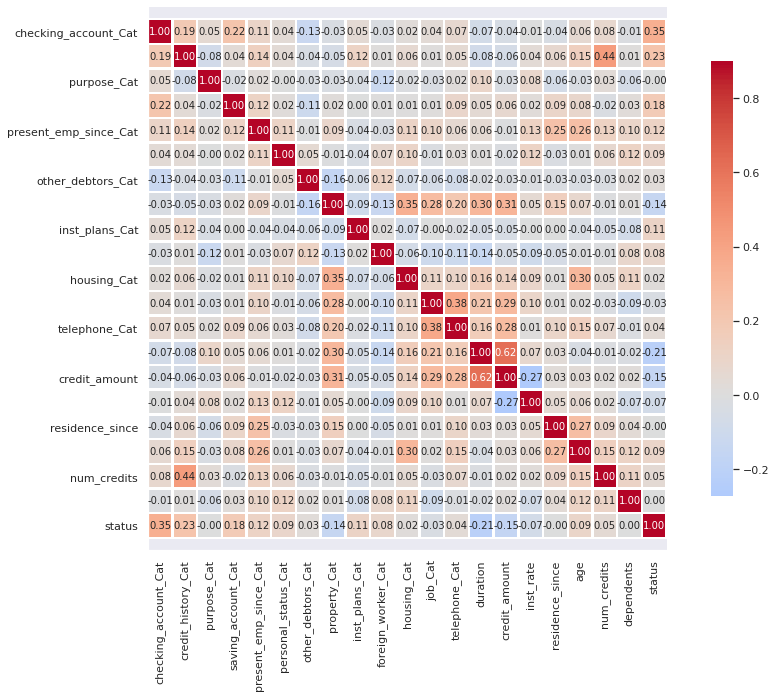

In [39]:
# Correlation

corr = df_final.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

# 1. PCA

In [40]:
from sklearn.decomposition import PCA 
pca = PCA(3)  
projected = pca.fit_transform(df_final)
print(df_final.shape)
print(projected.shape)
#print(pca.explained_variance_ratio_)

(1000, 21)
(1000, 3)


In [41]:
scaler = StandardScaler()
std_data = scaler.fit_transform(df_final)
std_data

array([[-1.25456565,  1.34401408,  0.26406793, ...,  1.02707891,
        -0.42828957,  0.65465367],
       [-0.45902624, -0.50342796,  0.26406793, ..., -0.704926  ,
        -0.42828957, -1.52752523],
       [ 1.13205258,  1.34401408,  1.35978547, ..., -0.704926  ,
         2.33486893,  0.65465367],
       ...,
       [ 1.13205258, -0.50342796,  0.26406793, ..., -0.704926  ,
        -0.42828957,  0.65465367],
       [-1.25456565, -0.50342796,  0.26406793, ..., -0.704926  ,
        -0.42828957, -1.52752523],
       [-0.45902624,  1.34401408, -0.83164962, ..., -0.704926  ,
        -0.42828957,  0.65465367]])

In [0]:
#co-variance computation
cov_mat = np.cov(std_data.T)

## Eigen Values and Eigen Vectors

In [43]:
#eigen decompostion of the covariance matrix
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print("Eigen values:", eig_vals)
print("Eigen vectors:", eig_vecs)

Eigen values: [2.54599077 2.14257042 1.49081637 0.25895985 1.36255881 1.22959713
 1.19958984 0.46951365 0.48474247 0.52875167 0.5742694  0.64204186
 1.1196005  1.0845335  0.696913   0.98618346 0.77106126 0.79403174
 0.82222396 0.88549579 0.93157557]
Eigen vectors: [[-5.81109214e-03  3.28849094e-01  4.21463264e-01  1.01168229e-02
   9.62616536e-03  1.65439297e-01 -1.73004984e-01  8.10680517e-02
  -5.80121029e-02 -8.94204571e-02 -3.96020697e-01  6.14410761e-01
  -1.60110046e-01 -4.16918838e-02 -7.19241637e-02 -6.44173861e-02
  -1.59430899e-01 -1.19137112e-01 -1.09198511e-01  1.26838332e-01
   1.05181029e-02]
 [-1.47301079e-02  4.15428172e-01  7.61149382e-02 -2.03015294e-02
   9.74366316e-02 -4.99395087e-01 -4.00352296e-02 -2.92545947e-01
  -6.18086289e-01  4.67845048e-02  1.45894653e-01 -9.72463519e-02
   5.49163865e-02 -7.27986926e-02 -2.25713595e-02  1.10583386e-01
  -2.60791309e-02  4.63445498e-02 -4.46596523e-02  1.83860627e-01
   1.67094317e-02]
 [-1.41811746e-02 -3.83428084e-02  9.

## Selecting Principle Component

In [44]:
# make a list of (eigenvalue, eigenvectors) tuples
eig_pairs = [(eig_vals[i], eig_vecs[i]) for i in range(len(eig_vals))]
# eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:i]) for i in range(len(eig_vals))]


# sort the eigenvalue, eigenvector tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

for i in eig_pairs:
    print(i[0])

print(len(eig_pairs))

2.5459907679881026
2.142570422563994
1.4908163685892095
1.362558808550038
1.2295971270685775
1.1995898429431904
1.119600503506955
1.0845335014423998
0.9861834625296111
0.9315755748311194
0.8854957931640075
0.8222239559137197
0.794031736658113
0.7710612569143652
0.6969129959652762
0.6420418581396808
0.574269397829501
0.5287516689908706
0.4847424681144952
0.4695136543505914
0.2589598549671983
21


## Estimating the importance features from variance

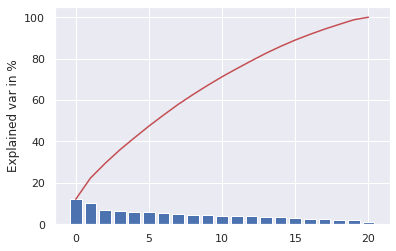

In [45]:

tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

#x_coordinates = ('PC1', 'PC2', 'PC3')
y_pos = np.arange(len(eig_pairs))

plt.bar(y_pos, var_exp, align='center')
plt.ylabel('Explained var in %')
#plt.xticks(y_pos, x_coordinates)
plt.plot(cum_var_exp, 'r')
plt.show()

In [46]:
# making the new projection matrix 
pro_mat = np.hstack((eig_pairs[0][1].reshape(len(eig_pairs),1),
                   eig_pairs[1][1].reshape(len(eig_pairs),1)))

print('Projection Matrix :\n', pro_mat)

Projection Matrix :
 [[-0.00581109 -0.01473011]
 [ 0.32884909  0.41542817]
 [ 0.42146326  0.07611494]
 [ 0.01011682 -0.02030153]
 [ 0.00962617  0.09743663]
 [ 0.1654393  -0.49939509]
 [-0.17300498 -0.04003523]
 [ 0.08106805 -0.29254595]
 [-0.0580121  -0.61808629]
 [-0.08942046  0.0467845 ]
 [-0.3960207   0.14589465]
 [ 0.61441076 -0.09724635]
 [-0.16011005  0.05491639]
 [-0.04169188 -0.07279869]
 [-0.07192416 -0.02257136]
 [-0.06441739  0.11058339]
 [-0.1594309  -0.02607913]
 [-0.11913711  0.04634455]
 [-0.10919851 -0.04465965]
 [ 0.12683833  0.18386063]
 [ 0.0105181   0.01670943]]


## Projected data - New matrix

In [47]:
new_mat = std_data.dot(pro_mat)
new_mat

array([[-0.16247978,  0.82986858],
       [ 0.05111168, -0.05053824],
       [ 0.58123364,  1.18000246],
       ...,
       [ 0.15280598, -0.66483448],
       [-0.85059581, -0.98831941],
       [ 0.24486291, -0.66612355]])

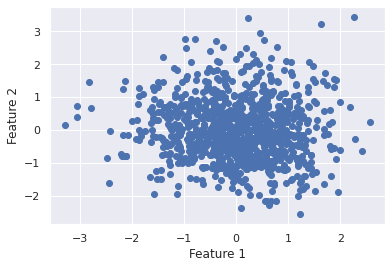

In [48]:
X = [new_mat[i][0] for i in range(len(new_mat))]
y = [new_mat[i][1] for i in range(len(new_mat))]
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.scatter(X, y)

# 2. K-Means

In [0]:
def prep_data_to_fit(df_final):
  
    # Getting data as values for clustering algorithms
    data_to_fit = df_final.values
    print (data_to_fit)
    return data_to_fit

In [0]:
def kmeans_cluster(data_to_fit, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(data_to_fit)
    #print ('score', kmeans.score(data_to_fit))
    print('silhouette_score', metrics.silhouette_score(data_to_fit, kmeans.labels_))
    cluster_indices = kmeans.predict(data_to_fit)
    return cluster_indices

In [0]:
def kmeans_plot(cluster_indices):
   fig, ax = plt.subplots()
   scatter = ax.scatter(data_to_fit[:,0],data_to_fit[:,1], s=150,marker='o',edgecolors='black' ,c = cluster_indices, cmap ="rainbow")

   # produce a legend with the unique colors from the scatter
   legend1 = ax.legend(*scatter.legend_elements(), loc="upper left", title="Clusters")
   ax.add_artist(legend1)
   plt.title('K-Means Clustering') 
   plt.gcf().set_size_inches(22,8)
   plt.show()

## Elbow Curve

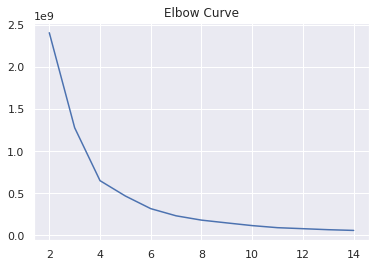

In [52]:
X =  df_final.values #Converting ret_var into nummpy array
sse = []
for k in range(2,15):
    
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    
    sse.append(kmeans.inertia_) #SSE for each n_clusters
plt.plot(range(2,15), sse)
plt.title("Elbow Curve")
plt.show()

## Silhoutte Graph

In [0]:
def plot_cluster(df, max_loop=50):
    """
    Looking at the performance of various number of clusters using K-Means.
    Performance is evaluated by within cluster SSE and silhouette score.
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]
    
    # robust scaling is used so that the centering and scaling statistics are therefore not influenced by a few number of very large marginal outliers as they are based on percentiles
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    
    sse_within_cluster = {}
    silhouette_score = {}
    
    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10, n_jobs=-1)
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

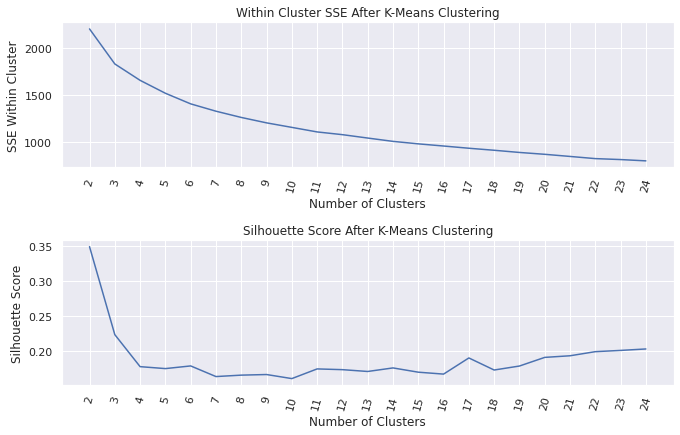

In [54]:
plot_cluster(df_credit_num, max_loop=25)

In [55]:
data_to_fit = prep_data_to_fit(df_credit_num)
data_to_fit.shape

[[   6 1169    4 ...    2    1    1]
 [  48 5951    2 ...    1    1    0]
 [  12 2096    2 ...    1    2    1]
 ...
 [  12  804    4 ...    1    1    1]
 [  45 1845    4 ...    1    1    0]
 [  45 4576    3 ...    1    1    1]]


(1000, 8)

silhouette_score 0.611669932542857


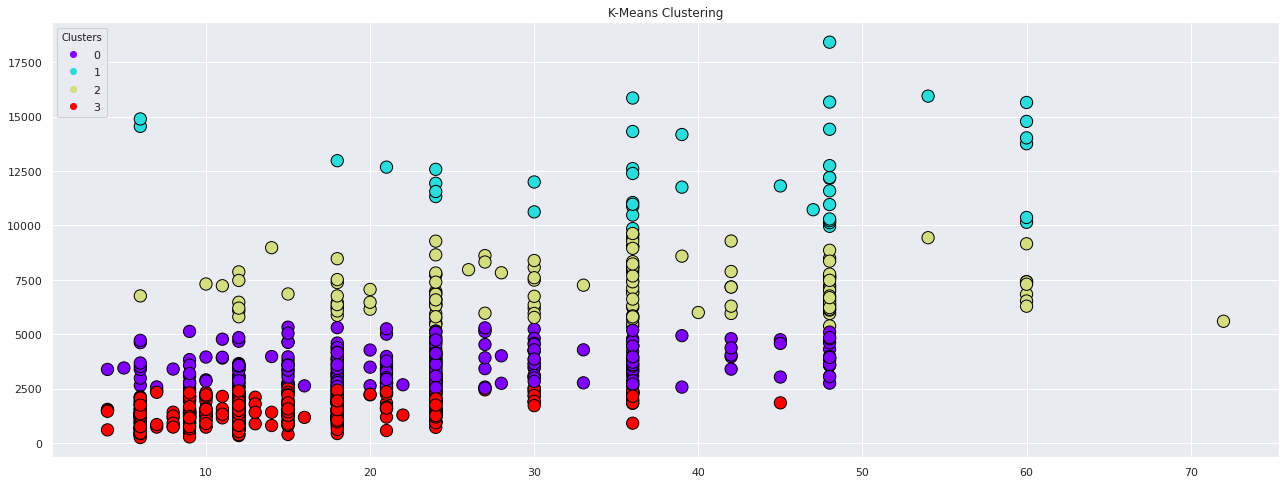

In [56]:
cluster_indices=kmeans_cluster (data_to_fit, 4)
kmeans_plot(cluster_indices)

## K-means clustering with PCA projected data

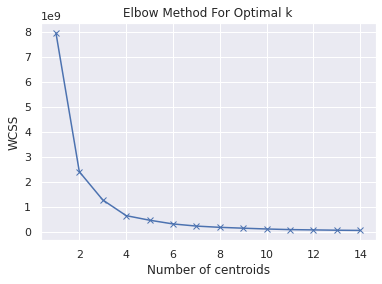

In [57]:
# Kmeans after PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(projected)
    wcss.append(km.inertia_)
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of centroids')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

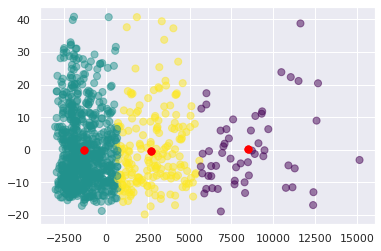

In [58]:
#converting our projected array to pandas df
pca=pd.DataFrame(projected)
pca.columns=['First component','Second Component','Third Component']
#build our algorithm with k=3, train it on pca and make predictions
kmeans = KMeans(n_clusters=3, random_state=0).fit(pca)
y_kmeans = kmeans.predict(pca)
#plotting the results 
plt.scatter(pca['First component'], pca['Second Component'], c=y_kmeans, s=50, alpha=0.5,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)

## Cluster Results

In [59]:
df_credit_cluster =  df_credit

df_credit_cluster['labels'] = y_kmeans

df_credit_cluster.head(3)

,checking_account,duration,credit_history,purpose,credit_amount,saving_account,present_emp_since,inst_rate,personal_status,other_debtors,residence_since,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status,age_Group,checking_account_Cat,credit_history_Cat,purpose_Cat,saving_account_Cat,present_emp_since_Cat,personal_status_Cat,other_debtors_Cat,property_Cat,inst_plans_Cat,foreign_worker_Cat,housing_Cat,job_Cat,telephone_Cat,labels
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1,Elder,0,4,4,4,4,2,0,0,2,0,1,2,1,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,0,Young,1,2,4,0,2,1,0,0,2,0,1,2,0,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1,Senior,3,4,7,0,3,2,0,0,2,0,1,1,0,1


In [60]:
df_credit_cluster.sort_values(['labels','age_Group', 'status'], ascending = False).groupby(['labels','age_Group','status']).size().reset_index(name='Count')



,labels,age_Group,status,Count
0,0,Elder,0,4
1,0,Elder,1,1
2,0,Senior,0,4
3,0,Senior,1,7
4,0,Young,0,16
5,0,Young,1,3
6,0,Young Adults,0,7
7,0,Young Adults,1,13
8,1,Elder,0,10
9,1,Elder,1,44


In [61]:
df_credit_cluster[df_credit_cluster['labels'] == 1].sort_values(['labels','age_Group','status'], ascending = False).groupby(['labels','age_Group','status'])['credit_amount'].max()

labels  age_Group     status
1       Elder         0         2767
                      1         3872
        Senior        0         3931
                      1         3868
        Young         0         3959
                      1         3973
        Young Adults  0         3966
                      1         3976
Name: credit_amount, dtype: int64

In [62]:
df_credit_cluster[df_credit_cluster['labels'] == 1].sort_values(['labels','age_Group','status'], ascending = False).groupby(['labels','age_Group','status'])['credit_amount'].min()

labels  age_Group     status
1       Elder         0         709
                      1         385
        Senior        0         697
                      1         250
        Young         0         433
                      1         276
        Young Adults  0         639
                      1         368
Name: credit_amount, dtype: int64

# GMM

In [0]:
def gmm_cluster(data_to_fit,n_clusters):
  print('gmm')
  gmm = GaussianMixture(n_components=n_clusters, max_iter=50).fit(data_to_fit)
  labels = gmm.predict(data_to_fit)
  gmm_scores = gmm.score_samples(data_to_fit)

  print('Means by sklearn:\n', gmm.means_)
  #print('Means by our implementation:\n', np.array([cluster['mu_k'].tolist() for cluster in clusters]))
  print('Scores by sklearn:\n', gmm_scores[0:20])
  #print('Scores by our implementation:\n', sample_likelihoods.reshape(-1)[0:20])

  print( gmm.bic(data_to_fit)) # 'BIC value: '

  fig, ax = plt.subplots()
  scatter = ax.scatter(data_to_fit[:,0],data_to_fit[:,1], s=150,marker='o',edgecolors='black' ,c = labels, cmap ="viridis")
   # produce a legend with the unique colors from the scatter
  legend1 = ax.legend(*scatter.legend_elements(), loc="upper left", title="Clusters")
  ax.add_artist(legend1)
  plt.title('GMM Clustering') 
  plt.gcf().set_size_inches(22,8)
  plt.show()

  gmm_plot(gmm,data_to_fit)

In [0]:
def gmm_plot(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    

In [65]:
data_to_fit = prep_data_to_fit(df_credit_num)
data_to_fit.shape

[[   6 1169    4 ...    2    1    1]
 [  48 5951    2 ...    1    1    0]
 [  12 2096    2 ...    1    2    1]
 ...
 [  12  804    4 ...    1    1    1]
 [  45 1845    4 ...    1    1    0]
 [  45 4576    3 ...    1    1    1]]


(1000, 8)

gmm
Means by sklearn:
 [[3.25536903e+01 6.38409182e+03 2.73005553e+00 2.87155301e+00
  3.57422375e+01 1.47700169e+00 1.00000000e+00 5.41305983e-01]
 [1.61965975e+01 1.91297147e+03 3.12552722e+00 2.80121479e+00
  3.45979442e+01 1.34024678e+00 1.00000000e+00 7.68373815e-01]
 [2.50000000e+01 8.07100000e+03 2.40000000e+00 3.20000000e+00
  4.84000000e+01 1.00000000e+00 1.60000000e+00 4.00000000e-01]
 [2.50596804e+01 4.54536665e+03 2.66546336e+00 2.92192276e+00
  3.84691456e+01 1.58034538e+00 2.00000000e+00 7.45251764e-01]
 [1.20129740e+01 1.33705701e+03 3.00088765e+00 3.02107769e+00
  3.85483965e+01 1.54295789e+00 2.00000000e+00 6.39159608e-01]]
Scores by sklearn:
 [-15.81223498 -16.67050074 -15.03415085 -16.79549622 -17.5574946
 -16.97949328 -13.30629902 -14.93723268 -15.4248506  -16.03725311
 -13.59883469 -17.18624914 -14.67433567 -16.82695024 -13.15102876
 -13.61192475 -13.19890598 -18.19368384 -19.56817108 -14.91717156]
31448.54319752297


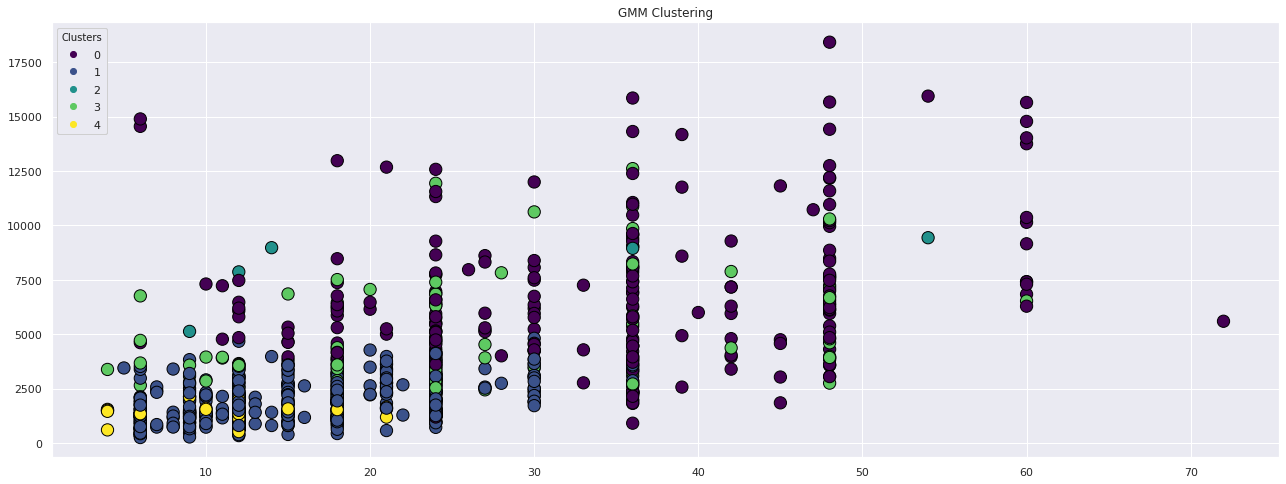

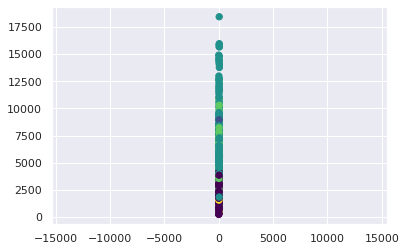

In [66]:
n_clusters=5
gmm_cluster(data_to_fit, n_clusters)

## GMM clustering with PCA projected data

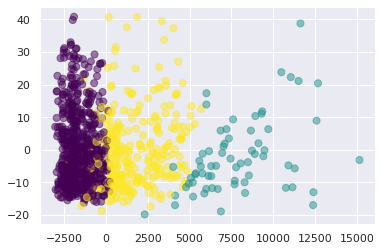

In [67]:
#converting our projected array to pandas df
pca=pd.DataFrame(projected)
pca.columns=['First component','Second Component','Third Component']

gmm = GaussianMixture(n_components=3, max_iter=50).fit(pca)
labels = gmm.predict(pca)
#plotting the results 
plt.scatter(pca['First component'], pca['Second Component'], c=labels, s=50, alpha=0.5,cmap='viridis')



# Training and Test data

In [68]:
df_final.columns

Index(['checking_account_Cat', 'credit_history_Cat', 'purpose_Cat',
       'saving_account_Cat', 'present_emp_since_Cat', 'personal_status_Cat',
       'other_debtors_Cat', 'property_Cat', 'inst_plans_Cat',
       'foreign_worker_Cat', 'housing_Cat', 'job_Cat', 'telephone_Cat',
       'duration', 'credit_amount', 'inst_rate', 'residence_since', 'age',
       'num_credits', 'dependents', 'status'],
      dtype='object')

In [0]:
X = df_final[['checking_account_Cat', 'credit_history_Cat', 'purpose_Cat',
       'saving_account_Cat', 'present_emp_since_Cat', 'personal_status_Cat',
       'other_debtors_Cat', 'property_Cat', 'inst_plans_Cat',
       'foreign_worker_Cat', 'housing_Cat', 'job_Cat', 'telephone_Cat',
       'duration', 'credit_amount', 'inst_rate', 'residence_since', 'age',
       'num_credits', 'dependents']]
Y = df_final[['status']]

In [70]:
# Setting the test size
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

print('X Training Observations: %d' % (len(X_train.index)))
print('X Testing Observations: %d' % (len(X_test.index)))
print('y Training Observations: %d' % (len(Y_train)))
print('y Testing Observations: %d' % (len(Y_test)))

X Training Observations: 700
X Testing Observations: 300
y Training Observations: 700
y Testing Observations: 300


# Random Forest 

Here using random forest for feature selection

In [71]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [0]:
estimator = clf.estimators_[16]

## Model Evaluation

In [73]:
print("accuracy score for Random Forest:")
print(accuracy_score(Y_test, Y_pred))
print("confusion matrix: ")
print(confusion_matrix(Y_test, Y_pred))
print("classification report: ")
print(classification_report(Y_test, Y_pred))

accuracy score for Random Forest:
0.6633333333333333
confusion matrix: 
[[  0 101]
 [  0 199]]
classification report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       101
           1       0.66      1.00      0.80       199

    accuracy                           0.66       300
   macro avg       0.33      0.50      0.40       300
weighted avg       0.44      0.66      0.53       300



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree

In [0]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='gini')

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)



## Model Evaluation

In [75]:
print("accuracy score for Decision Tree:")
print(accuracy_score(Y_test, Y_pred))
print("confusion matrix: ")
print(confusion_matrix(Y_test, Y_pred))
print("classification report: ")
print(classification_report(Y_test, Y_pred))

accuracy score for Decision Tree:
0.64
confusion matrix: 
[[ 47  54]
 [ 54 145]]
classification report: 
              precision    recall  f1-score   support

           0       0.47      0.47      0.47       101
           1       0.73      0.73      0.73       199

    accuracy                           0.64       300
   macro avg       0.60      0.60      0.60       300
weighted avg       0.64      0.64      0.64       300



# Linear Regression

In [0]:
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) #training the algorithm

Y_pred = regressor.predict(X_test)


## Model Evaluation

In [77]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))


Mean Absolute Error: 0.3484694246655955
Mean Squared Error: 0.1769232174304108
Root Mean Squared Error: 0.4206224166998364


# Logistic Regression

In [78]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, Y_train)

Y_pred = logistic_regression.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Model Evaluation

In [79]:
print("accuracy score for Logistic Regression:")
print(accuracy_score(Y_test, Y_pred))
print("confusion matrix: ")
print(confusion_matrix(Y_test, Y_pred))
print("classification report: ")
print(classification_report(Y_test, Y_pred))

accuracy score for Logistic Regression:
0.7333333333333333
confusion matrix: 
[[ 39  62]
 [ 18 181]]
classification report: 
              precision    recall  f1-score   support

           0       0.68      0.39      0.49       101
           1       0.74      0.91      0.82       199

    accuracy                           0.73       300
   macro avg       0.71      0.65      0.66       300
weighted avg       0.72      0.73      0.71       300



# SVM

In [80]:
clf = SVC()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Model Evaluation

In [81]:
print("accuracy score for SVM:")
print(accuracy_score(Y_test, Y_pred))
print("confusion matrix: ")
print(confusion_matrix(Y_test, Y_pred))
print("classification report: ")
print(classification_report(Y_test, Y_pred))

accuracy score for SVM:
0.6766666666666666
confusion matrix: 
[[  5  96]
 [  1 198]]
classification report: 
              precision    recall  f1-score   support

           0       0.83      0.05      0.09       101
           1       0.67      0.99      0.80       199

    accuracy                           0.68       300
   macro avg       0.75      0.52      0.45       300
weighted avg       0.73      0.68      0.56       300



# KNN

In [82]:
clf = KNeighborsClassifier()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


## Model Evaluation

In [83]:
print("accuracy score for KNN:")
print(accuracy_score(Y_test, Y_pred))
print("confusion matrix: ")
print(confusion_matrix(Y_test, Y_pred))
print("classification report: ")
print(classification_report(Y_test, Y_pred))

accuracy score for KNN:
0.63
confusion matrix: 
[[ 18  83]
 [ 28 171]]
classification report: 
              precision    recall  f1-score   support

           0       0.39      0.18      0.24       101
           1       0.67      0.86      0.75       199

    accuracy                           0.63       300
   macro avg       0.53      0.52      0.50       300
weighted avg       0.58      0.63      0.58       300



# Naive Bayes

In [84]:
clf = GaussianNB()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Model Evaluation

In [85]:
print("accuracy score for Naive Bayes:")
print(accuracy_score(Y_test, Y_pred))
print("confusion matrix: ")
print(confusion_matrix(Y_test, Y_pred))
print("classification report: ")
print(classification_report(Y_test, Y_pred))

accuracy score for Naive Bayes:
0.7666666666666667
confusion matrix: 
[[ 65  36]
 [ 34 165]]
classification report: 
              precision    recall  f1-score   support

           0       0.66      0.64      0.65       101
           1       0.82      0.83      0.83       199

    accuracy                           0.77       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.77      0.77      0.77       300



# XGBoost

In [86]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model_xgb = XGBClassifier()
model_xgb.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model_xgb.predict(rescaledValidationX)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Model Evaluation

In [87]:
print("accuracy score for XGBoost:")
print(accuracy_score(Y_test, predictions))
print("confusion matrix: ")
print(confusion_matrix(Y_test, predictions))
print("classification report: ")
print(classification_report(Y_test, predictions))

accuracy score for XGBoost:
0.7666666666666667
confusion matrix: 
[[ 48  53]
 [ 17 182]]
classification report: 
              precision    recall  f1-score   support

           0       0.74      0.48      0.58       101
           1       0.77      0.91      0.84       199

    accuracy                           0.77       300
   macro avg       0.76      0.69      0.71       300
weighted avg       0.76      0.77      0.75       300



# Insights

## Business case and value

 This German credit dataset is a widely used dataset for various type analysis using different machine learning algorithms. There are 1000 observations in this dataset. Among 21 variables, 20 variables are independent , the dependent variable the evaluation of client's current credit status. Data in this set is replaced due to privacy concerns. Here target variable 'status' represents the 'good' or 'bad' credit score of each person based on the set of attributes. This dataset can add great business value in adding different perspectives. Here I have focused more on the 'age' and 'credit amount'  to see what deeper insight can be found from this data set. Analyzing the data from different angles can shed light on scenarios to answer queries like 'which age group borrows the most credit amount' , 'type of loan by different age group', 'amount of wealth for different age group' etc to add more business value.







## Data Analysis

 Data Narrative and Visualization parts contain the detail of these analysis and related descriptions. Correlation plot shows that credit amount is highly correlated with duration. Age is correlated with housing category, purpose and credit amount. So I have tried to enrich data by adding one computed column called 'age group' containing four groups - Young, Yound Adults, Senior, Elder and doing latent manifold on that to see its effect on different scenarios.



## Interpretation of algorithms

I have implemented GMM, K-means, Logistic regression, Linear Regression, XGBoost, Random Forest, Decision Tree, SVM, KNN, PCA and NaiveBayes algorithms on this data set. All the algorithms do not fall into the same category, hence accuracy measures are different. Following table contains algorithms with their evaluation measuring factors and values:

Algorithms | Performance Score | Performance Measure Metric
--- | --- | ---
1. PCA |3 Principal Components can contain almost 60% of the information | Explained Variance Ratio
2. K-means | 0.7 | Silhouette score 
3. GMM | -1158.00 | BIC
4. Random Forest       | .71 | Accuracy
                       |0.50/0.71 | Precision [0/1]
                       |0.01/1    | Recall [0/1]
                       |0.02/0.83 | F1-score [0/1]
                       |87/213    | Support [0/1]
5. Decision Tree       | .65 | Accuracy
                       |0.49/0.80 | Precision [0/1]
                       |0.53/.77   | Recall [0/1]
                       |0.51/0.79 | F1-score [0/1]
                       |87/213    | Support [0/1]
6. Linear Regression   |0.35 |Mean Absolute Error
                       |0.18 |Mean Squared Error
                       |0.42 |Root Mean Squared Error
7. Logistic Regression | .74 | Accuracy
                       |0.64/0.77 | Precision [0/1]
                       |0.43/.89  | Recall [0/1]
                       |0.51/0.82 | F1-score [0/1]
                       |96/204    | Support [0/1]
8. SVM                 | .69 | Accuracy
                       |0.67/0.69 | Precision [0/1]
                       |0.06/0.99 | Recall [0/1]
                       |0.11/0.81 | F1-score [0/1]
                       |96/204    | Support [0/1]
9. KNN                 | .62 | Accuracy
                       |0.31/0.68 | Precision [0/1]
                       |0.17/0.82 | Recall [0/1]
                       |0.22/0.74 | F1-score [0/1]
                       |96/204    | Support [0/1] 
10. Naive Bayes        | .72 | Accuracy
                       |0.56/0.80 | Precision [0/1]
                       |0.57/0.78 | Recall [0/1]
                       |0.56/0.79 | F1-score [0/1]
                       |96/204    | Support [0/1] 
11. XGBoost            | .80 | Accuracy
                       |0.57/0.76 | Precision [0/1]
                       |0.42/0.85 | Recall [0/1]
                       |0.48/0.80 | F1-score [0/1]
                       |96/204    | Support [0/1] 

-----------------------------------------------------------------------
 
* First I started with PCA. This data set has 20 independent variables, so for feature reduction I have implemented PCA to see the impact. Based on the explained variance ratio, I have selected 3 principal components that covers more than 60% information.
 
* Then I have implemented two clustering algorithms- K-means and GMM. For K-means, accuracy metric is Silhouette score, whereas for GMM I have used Bayesian Information Criterion( BIC). Using the associated metric and their value, I have determined the number of clusters, iteration etc. For K-means, the Elbow curve is also computed. From the scatter plot representation of clustering algorithms, it seems that the K-means algorithm is separating the clusters better than GMM for full data set. I have again applied both the clustering algorithms on PCA projected values to see the difference and found that clusters are now more well defined than before.
  
* Rest of the implemented classificationalgorithms are XGBoost, Random Forest, Decision Tree, SVM, KNN and NaiveBayes. Among them Decision Tree, SVM and KNN have shown average performance in classifying data with accuracy lying in the range 62 - 69%. Random forest, Naive Bayes and XGBoost have classified this data set with better accuracy and fall in the range 71% -80%. 

*  This data set belongs to a binary classification problem. After applying clustering and classification algorithms, I have applied regression techniques on data. Linear regression algorithm has performed reasonably with RMSE value 0.4. On the other side, Logistic regression has performed quite well with accuracy 74%. I have also computed confusion matrix, f1- score etc. Values are listed in the above table.



             
































## Conclusion

I have already mentioned that my analysis on this data set is focusing on age and credit amount, and I have also added an age group column to enrich data set. Therefore I analyzed clustering outcomes from 'age group' perspective (Cluster result is printed inside cluster implementation section). From the large cluster group, I can see that, people from Young and Young adult are higher in number to get good 'status' compared to people from Senior and Elder group. Moreover within cluster-1, the credit amount for 'good' Young group of people remains between 368 to 3976 and 276 to 3973 for 'good' young group of people. Later I implemented classification and regression on top of that which is discussed in detail in the above section. 
 
To conclude, it can be said these findings can help the decision making process of the bank to decide about giving credit to a client of a particular cluster or age group and will definitely add business value.




# Reference

1. https://archive.ics.uci.edu/ml/datasets/Statlog+(German+Credit+Data)
2. http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/
3. https://www.kdnuggets.com/2019/10/clustering-metrics-better-elbow-method.html
4. https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f